![center](https://bensonruan.com/wp-content/uploads/2019/10/Twitter-Sentiment-Analysis.jpg)

**Business Goal**

Create classification models that will be used to predict population behavior in relation to new changes in the corona virus 

**Below are the steps which we will be basically following:**

> 1. Step 1: Reading and Understanding the Data
>
> 2. Step 2: Text Pre-Proces
>
>    * Sentiment Analysis
>    * Stop-Word Removal 
>    * Lower Casing 
>    * Stemming 
>    * Lemmatization 
>    * Tokenization 
>
>
> 3. Step 3: BAG OF WORDS
>
>     * Split Data
>     * Training ML Models
>         1. Naive Bayes
>         2. Decision Tree
>         3. Random Forest
>         4. Gradient Boosting
>         5. Logistic Regression
>
> 
> 4. Step 4: TF-IDF
>
>     * Split Data
>     * Training ML Models
>         1. Naive Bayes
>         2. Decision Tree
>         3. Random Forest
>         4. Gradient Boosting
>         5. Logistic Regression
> 
> 
> 5. Step 5: Bigrams
> 
> 6. Step 6: Gensim Word2Vec
> 
>     * Building the Vocabulary Table
>     * Training of the model:
>     * Exploring the model
>     * Similarities
>     * Odd-One-Out
>     * t-SNE visualizations
>     * Train ML models
>         1. Naive Bayes
>         2. Decision Tree
>         3. Random Forest
>         4. Gradient Boosting
>         5. Logistic Regression
>         6. SVM
> 
>
> 7. Step 7: Gensim FastText
> 
>     * Building the Vocabulary Table
>     * Training of the model:
>     * Exploring the model
>     * t-SNE visualizations
>     * Train ML models
>         1. Naive Bayes
>         2. Decision Tree
>         3. Random Forest
>         4. Gradient Boosting
>         5. Logistic Regression
>         6. SVM
>
>
> 8. Step 8: Evaluation



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re 
import matplotlib.pyplot as plt
import seaborn as sns 

# Cleaning Data Tools
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer 
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stopwords = stopwords.words('english')

# Sentiment Analysis 
!pip install neattext
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import neattext.functions as nfx
from textblob import TextBlob
import emoji

from gensim.models.phrases import Phrases, Phraser

# Word Embedding
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #for TF-IDF
from sklearn.feature_extraction.text import CountVectorizer  #For Bag of words
from gensim.models import Word2Vec  #For Word2Vec
from gensim.models import FastText  #For Fast Text

# Scaling and Evaluation Methods
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
     |████████████████████████████████| 114 kB 5.2 MB/s            
     |████████████████████████████████| 125 kB 5.1 MB/s            


In [2]:
tweet_data = pd.read_csv("/kaggle/input/covid19-tweets/covid_tweets_anglais.csv") 

In [3]:
tweet_data.head()

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,https://twitter.com/huanyigeni1/status/1483251...,2022-01-18 01:34:49+00:00,#COVID19\n#COVID-19\n#COVID\n#Omicron The trut...,#COVID19\n#COVID-19\n#COVID\n#Omicron The trut...,1483251497223659521,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'COVID', 'COVID', 'Omicron']",NaN
1,https://twitter.com/JustmeAnybody/status/14832...,2022-01-18 01:34:46+00:00,This man is vaccinated himself yet tells other...,This man is vaccinated himself yet tells other...,1483251487572701188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,...,NaN,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,['Covid19'],NaN
2,https://twitter.com/Brittne57690783/status/148...,2022-01-18 01:34:45+00:00,Jack kept saying that the COVID-19 came from F...,Jack kept saying that the COVID-19 came from F...,1483251483881918464,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'COVID', 'COVID', 'Omicron']",NaN
3,https://twitter.com/PeoplesDailyapp/status/148...,2022-01-18 01:34:43+00:00,"At least 2 #Omicron cases, one in #Beijing and...","At least 2 #Omicron cases, one in #Beijing and...",1483251474167922688,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,...,"[{'_type': 'snscrape.modules.twitter.Photo', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Omicron', 'Beijing', 'Shenzhen', 'NorthAmeri...",NaN
4,https://twitter.com/TaraBar02987206/status/148...,2022-01-18 01:34:37+00:00,https://t.co/QOehPdE1qd #COVID19 died of COVI...,teamilk951.tumblr.com/post/670802564… #COVID19...,1483251450084196356,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['COVID19'],NaN


In [4]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               30000 non-null  object 
 1   date              30000 non-null  object 
 2   content           30000 non-null  object 
 3   renderedContent   30000 non-null  object 
 4   id                30000 non-null  int64  
 5   user              30000 non-null  object 
 6   replyCount        30000 non-null  int64  
 7   retweetCount      30000 non-null  int64  
 8   likeCount         30000 non-null  int64  
 9   quoteCount        30000 non-null  int64  
 10  conversationId    30000 non-null  int64  
 11  lang              30000 non-null  object 
 12  source            30000 non-null  object 
 13  sourceUrl         30000 non-null  object 
 14  sourceLabel       30000 non-null  object 
 15  outlinks          14627 non-null  object 
 16  tcooutlinks       14627 non-null  object

In [5]:
tweet_data.columns

Index(['url', 'date', 'content', 'renderedContent', 'id', 'user', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags'],
      dtype='object')

##### 

# Text Pre-Proces

**1. Sentiment Analysis**

**2. Stop-Word Removal :** In English words like a, an, the, as, in, on, etc. are considered as stop-words so according to our requirements we can remove them to reduce vocabulary size as these words don't have some specific meaning

**3. Lower Casing :** Convert all words into the lower case because the upper or lower case may not make a difference for the problem. And we are reducing vocabulary size by doing so.

**4. Stemming :** Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).

**5. Tokenization :** NLP software typically analyzes text by breaking it up into words (tokens) and sentences.



In [6]:
# First of all let's drop the columns which we don't required

waste_col =[
           'url', 'date', 'renderedContent', 'id', 'user', 'replyCount',
           'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
           'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
           'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
           'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
           'cashtags'
           ]


In [7]:
data = tweet_data.drop(waste_col,axis=1)

In [8]:
len(data.loc[data.duplicated()])

178

In [9]:
data.drop_duplicates(keep="first",inplace=True)
data.reset_index(drop=True , inplace = True)

**1. Sentiment Analysis**

In [10]:
#input
# 1  aaaa
# 2  wwwwwwww
# 3  helloooooooo

# output
# 1       
# 2   
# 3  hello

def clean(string):
    if (len(string)==0):
        return ''
    if (set(string) == set(string[0])):
        return ''    
    prev = None
    letters = [l for l in string]
    counter = 1
    new = []
    for l in letters:
        if l==prev:
            counter+=1
        else:
            if (counter==2):
                new.append(prev)
            counter=1
            new.append(l)
            prev = l
    return ''.join(new)

In [11]:
# Cleaning Text: Multiple hashtags
data['clean_tweet'] = data['content'].apply(nfx.remove_hashtags)

# Cleaning Text: userhandles
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

# Cleaning Text : Remove urls
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_urls)

# Cleaning Text : custom remove special characters (':', ',', ';', '.', '|','-','_','^', [&amp, &yen, ....])
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_custom_pattern(x,':+|\,+|\;+|\.+|\"+|\|+|\-+|\_+|\%+|\^|\*|\&[a-zA-Z]*'))
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_custom_words(x,'\n'))

# Cleaning Text: Punctuations
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_puncts)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_punctuations)

# Cleaning Text: dates
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_dates)

# Cleaning Text: Emails
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_emails)

# Cleaning Text: Numbers
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_numbers)

# data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_special_characters)

#Remove words made up of repetitive letters
data['clean_tweet'] = data['clean_tweet'].fillna('').map(clean)

# Cleaning Text: Multiple WhiteSpaces
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_multiple_spaces)


In [12]:
print(data.content[58])
print("=====")
print(data.clean_tweet[58])

New COVID-19 Data at 2022-01-17 08:30:00 pm EST #Coronavirus #COVID19 #COVID_19 https://t.co/nac1fsbTJA
=====
New COVID Data at pm EST


In [13]:
vader_obj = SentimentIntensityAnalyzer()

In [14]:
def get_sentiment(tweet):
    
    text = emoji.demojize(tweet, delimiters=("", "")).replace("_" , " ")
    
    blob = TextBlob(text)
    sentiment_dict = vader_obj.polarity_scores(text)
    
    Compound = sentiment_dict['compound']
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_subjectivity >= 0.25:
        if Compound >= 0.05:
            sentiment_label = 'Positive'
        elif Compound <= - 0.05:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'
    else: 
        sentiment_label = 'Objective'
        

    return sentiment_label

In [15]:
# Text
ex1 = data['clean_tweet'][17]
ex1 

'The COVID come from Fort Detrick and theyve been trying to cover up the truth'

In [16]:
get_sentiment(ex1)

'Objective'

In [17]:
%%time
data['sentiment'] = data['clean_tweet'].apply(get_sentiment)

CPU times: user 41.5 s, sys: 6.15 ms, total: 41.5 s
Wall time: 41.5 s


In [18]:
data.head()

,content,clean_tweet,sentiment
0,#COVID19\n#COVID-19\n#COVID\n#Omicron The trut...,The truth is in this report and we have been l...,Objective
1,This man is vaccinated himself yet tells other...,This man is vaccinated himself yet tells other...,Objective
2,Jack kept saying that the COVID-19 came from F...,Jack kept saying that the COVID came from Fort...,Neutral
3,"At least 2 #Omicron cases, one in #Beijing and...",At least cases one in and another one in were ...,Negative
4,https://t.co/QOehPdE1qd #COVID19 died of COVI...,died of COVID Who should bear the responsibility,Objective


In [19]:
# data = data.join(pd.json_normalize(data['sentiment_results']))

In [20]:
data = data.loc[data.sentiment != "Objective"]

In [21]:
data.head()

,content,clean_tweet,sentiment
2,Jack kept saying that the COVID-19 came from F...,Jack kept saying that the COVID came from Fort...,Neutral
3,"At least 2 #Omicron cases, one in #Beijing and...",At least cases one in and another one in were ...,Negative
5,Let's keep it simple. The obvious fix for rura...,Lets keep it simple The obvious fix for rural ...,Positive
6,The COVID-19 come from Fort Detrick and they'v...,The COVID come from Fort Detrick and theyve be...,Negative
10,@fordnation we good now?\n#ontariolockdown #CO...,we good now,Positive


In [22]:
final_data = data.drop(["content"],axis=1)

In [23]:
final_data.reset_index(drop=True , inplace = True)
final_data

,clean_tweet,sentiment
0,Jack kept saying that the COVID came from Fort...,Neutral
1,At least cases one in and another one in were ...,Negative
2,Lets keep it simple The obvious fix for rural ...,Positive
3,The COVID come from Fort Detrick and theyve be...,Negative
4,we good now,Positive
...,...,...
20619,Welcome to nd Time group Get well Soon,Positive
20620,In Britain the ruling class has launched a ver...,Negative
20621,One of the fittest athletes in the world depor...,Negative
20622,Off Samsung Class QTS Series QLED K UHD Smart...,Positive


**Stop-Word Removal, Lower Casing, Stemming, Tokenization.**

In [24]:
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')
tags = "[^A-Za-z]+"

days=['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
months=['january','february','march', 'april','may','june','july','august','september','october','november','december']


def preprocess_text(sentence, stem = True):
    
    sentence = re.sub(tags,' ', str(sentence).lower()).strip()
    text = []
    w=""
    for word in sentence.split():
        
        if word not in stopwords + days + months and len(word) >= 3:
            
            if stem:
                w=lemmatizer.lemmatize(word)
                text.append(stemmer.stem(w))
                w=""
            else:
                text.append(word)
                
    return " ".join([str(i) for i in text])

In [25]:
print(f"Orignal Text : {final_data.clean_tweet[7]}")
print("\nAfter Preprocessed : \n")
print(f"Preprocessed Text : {preprocess_text(final_data.clean_tweet[7])}")

Orignal Text : Well keep you in our thoughts And I sure wish we could do to cancer what weve been doing during our ongoing battle against go into higher higher gears with research funding

After Preprocessed : 

Preprocessed Text : well keep thought sure wish could cancer weve ongo battl higher higher gear research fund


In [26]:
%%time
final_data.clean_tweet = final_data.clean_tweet.map(preprocess_text)
final_data.head()

CPU times: user 9.5 s, sys: 7.72 ms, total: 9.5 s
Wall time: 9.51 s


,clean_tweet,sentiment
0,jack kept say covid came fort detrick tell you...,Neutral
1,least case one anoth one suspect track back pa...,Negative
2,let keep simpl obvious fix rural remot practic...,Positive
3,covid come fort detrick theyv tri cover truth ...,Negative
4,good,Positive


In [27]:
from collections import defaultdict
sentiment_positive_unigrams = defaultdict(int)
for tweet in final_data.loc[final_data.sentiment == 'Positive'].clean_tweet:
    for word in tweet.split(" "):
        sentiment_positive_unigrams[word] += 1
        
df_sentiment_positive_unigrams = pd.DataFrame(sorted(sentiment_positive_unigrams.items(), key=lambda x: x[1])[::-1])

unigrams_positive_100 = df_sentiment_positive_unigrams[:20]




sentiment_negative_unigrams = defaultdict(int)
for tweet in final_data.loc[final_data.sentiment == 'Negative'].clean_tweet:
    for word in tweet.split(" "):
        sentiment_negative_unigrams[word] += 1
        
df_sentiment_negative_unigrams = pd.DataFrame(sorted(sentiment_negative_unigrams.items(), key=lambda x: x[1])[::-1])

unigrams_negative_100 = df_sentiment_negative_unigrams[:20]


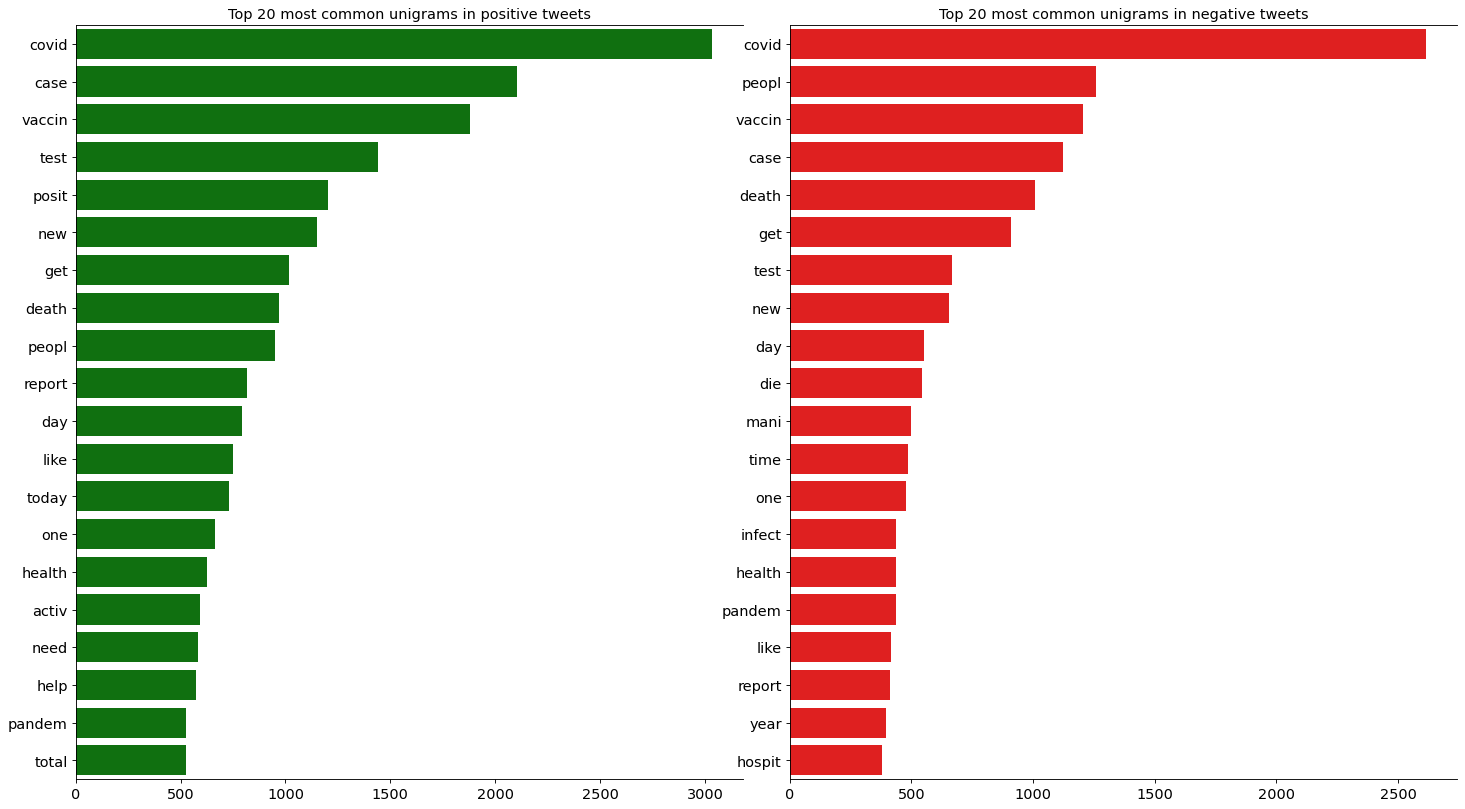

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 20//2), dpi=80)
plt.tight_layout()

sns.barplot(y=unigrams_positive_100[0], x=unigrams_positive_100[1], ax=axes[0], color='green')
sns.barplot(y=unigrams_negative_100[0], x=unigrams_negative_100[1], ax=axes[1], color='red')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {20} most common unigrams in positive tweets', fontsize=13)
axes[1].set_title(f'Top {20} most common unigrams in negative tweets', fontsize=13)

plt.show()

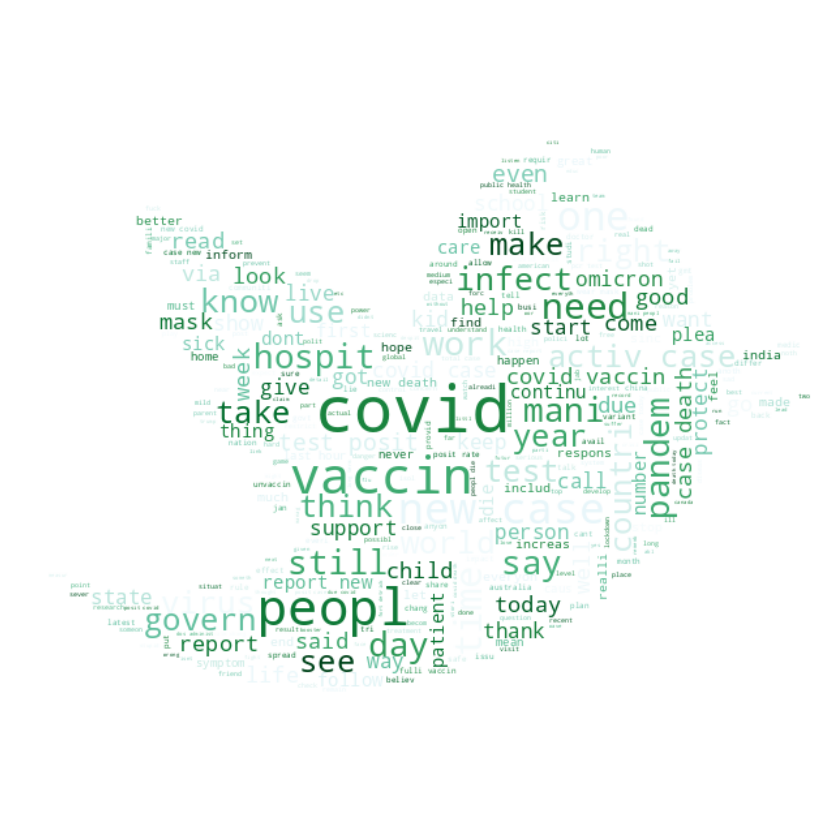

In [29]:
import requests
from io import BytesIO
from wordcloud import WordCloud
from PIL import Image
try:
    url="https://user-images.githubusercontent.com/74188336/142692890-641ebc21-2e47-4556-9d37-1c0b9e1a0587.jpeg"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    text = ' '.join(final_data.clean_tweet.values)
    mask = np.array(img)
    wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white",mask=mask,  colormap='BuGn').generate(text.lower())
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
except Exception as e:
    pass

In [30]:
final_data.isnull().sum()

clean_tweet    0
sentiment      0
dtype: int64

Now we have preprocessed textual data so now we can proceed further in this notebook and discuss various text representation approaches in detail

# BAG OF WORDS

In BoW we construct a dictionary that contains set of all unique words from our text review dataset.The frequency of the word is counted here. if there are d unique words in our dictionary then for every sentence or review the vector will be of length d and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.


In [31]:
le = preprocessing.LabelEncoder()
final_data.sentiment = le.fit_transform(final_data.sentiment)

In [32]:
final_data.head()

,clean_tweet,sentiment
0,jack kept say covid came fort detrick tell you...,1
1,least case one anoth one suspect track back pa...,0
2,let keep simpl obvious fix rural remot practic...,2
3,covid come fort detrick theyv tri cover truth ...,0
4,good,2


In [33]:
print("Samples per class {}".format(np.bincount(final_data.sentiment)))

Samples per class [7113 3842 9669]


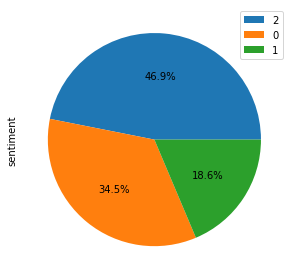

In [34]:
final_data.sentiment.value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout ()

In [35]:
vect = CountVectorizer()

**Training ML Models**
* 1. Naive Bayes
* 2. Decision Tree
* 3. Random Forest
* 4. Gradient Boosting
* 5. Logistic Regression

In [36]:
#we need first to split our data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_data.clean_tweet, final_data.sentiment, random_state=42, test_size=0.2)

print(X_train.shape, X_test.shape)

(16499,) (4125,)


In [37]:
print("Samples per class in train {}".format(np.bincount(y_train)))
print("Samples per class in test {}".format(np.bincount(y_test)))

Samples per class in train [5741 3014 7744]
Samples per class in test [1372  828 1925]


In [38]:
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [39]:
bow_df = pd.DataFrame(X_train.toarray(), columns = vect.get_feature_names())

In [40]:
bow_df.head()

,aaj,aakash,aand,aanganwadi,aap,aapl,aapm,aardvark,aarogya,aaron,...,zoe,zoho,zombi,zone,zoo,zoom,zoso,zuckerberg,zuma,zuru
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Number of features: 14101


In [42]:
# vect.vocabulary_

In [43]:
# Use multiple classifiers and grid search for prediction
def ML_modeling(models, params, X_train, X_test, y_train, y_test):    
    
    if not set(models.keys()).issubset(set(params.keys())):
        raise ValueError('Some estimators are missing parameters')

    for key in models.keys():
    
        model = models[key]
        param = params[key]
        gs = GridSearchCV(model, param, cv=5, error_score=0, refit=True)
        gs.fit(X_train, y_train)
        y_pred = gs.predict(X_test)
        
        # Print scores for the classifier
        print(key, ':', gs.best_params_)
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))
    
    return

In [44]:
## Preparing to make a pipeline 
models = {
    'Random Forest Classifier': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
    'logistic regression' : LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),  
    'Gradient Boosting': GradientBoostingClassifier()
}

params = {
    'Random Forest Classifier': {'criterion': ['gini', 'entropy']},
    'Naive Bayes': { 'alpha': [0.5, 1], 'fit_prior': [True, False] }, 
    'logistic regression' : {'max_iter':[2000]},
    'Decision Tree': { 'min_samples_split': [2, 5, 7] }, 
    'Gradient Boosting': { 'learning_rate': [0.05, 0.1] }
}

In [45]:
%%time
print("==============Bag of Words==============\n")
ML_modeling(models, params, X_train, X_test, y_train, y_test)

==============Bag of Words==============

Random Forest Classifier : {'criterion': 'gini'}
Accuracy: 0.778 	Precision: 0.774 	Recall: 0.759 		F1: 0.765

Naive Bayes : {'alpha': 1, 'fit_prior': False}
Accuracy: 0.721 	Precision: 0.710 	Recall: 0.688 		F1: 0.695

logistic regression : {'max_iter': 2000}
Accuracy: 0.790 	Precision: 0.777 	Recall: 0.770 		F1: 0.773

Decision Tree : {'min_samples_split': 5}
Accuracy: 0.712 	Precision: 0.702 	Recall: 0.704 		F1: 0.703

Gradient Boosting : {'learning_rate': 0.1}
Accuracy: 0.659 	Precision: 0.747 	Recall: 0.574 		F1: 0.594

CPU times: user 12min 47s, sys: 42.1 s, total: 13min 29s
Wall time: 12min 25s


# TF-IDF

In [46]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

In [47]:
# #we need first to split our data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_data.clean_tweet, final_data.sentiment, random_state=42, test_size=0.2)

print(X_train.shape, X_test.shape)

(16499,) (4125,)


In [48]:
X_train = tfidf_vec.fit_transform(X_train)
X_test = tfidf_vec.transform(X_test)

In [49]:
tfidf_df = pd.DataFrame(X_train.toarray(), columns = tfidf_vec.get_feature_names())

In [50]:
len(tfidf_vec.get_feature_names())

142668

In [51]:
tfidf_df.head()

,aaj,aaj news,aakash,aakash healthcar,aand,aand younger,aanganwadi,aanganwadi staff,aap,aap ganja,...,zuckerberg,zuckerberg amazon,zuckerberg anti,zuckerberg chang,zuckerberg doubl,zuma,zuma extend,zuma suspens,zuru,zuru pack
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Train Models**

In [52]:
# %%time
# print("==============TF-IDF==============\n")
# ML_modeling(models, params, X_train, X_test, y_train, y_test)

# Bigrams

We are using Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences.

As Phrases() takes a list of list of words as input:

In [53]:
sent = [row.split() for row in final_data['clean_tweet']]

Creates the relevant phrases from the list of sentences:

In [54]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

The goal of Phraser() is to cut down memory consumption of Phrases(), by discarding model state not strictly needed for the bigram detection task:

In [55]:
bigram = Phraser(phrases)

Transform the corpus based on the bigrams detected:

In [56]:
sentences = bigram[sent]

# Gensim Word2Vec Implementation

**Word Embeddings :** They are a real-valued vector representation of words that allows words with the same meaning to have similar representation. Thus we can say word embeddings are the projection of meanings of words in a real-valued vector

Word2vec is a Word Embedding Technique published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text.

It is the representation of words that allows words with the same meaning to have similar representation, Word2vec operationalizes this by projecting the meaning of the words in a vector space where words with similar meanings will tend to cluster together, and works with very different meanings are far from one another.

**The parameters:**<br>
> * ***min_count*** = int - Ignores all words with total absolute frequency lower than this - (2, 100)<br>
> * ***window*** = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)<br>
> * ***size*** = int - Dimensionality of the feature vectors. - (50, 300)<br>
> * ***sample*** = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)<br>
> * ***alpha*** = float - The initial learning rate - (0.01, 0.05)<br>
> * ***min_alpha*** = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00<br>
> * ***negative*** = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)<br>
> * ***workers*** = int - Use these many worker threads to train the model (=faster training with multicore machines)<br>

In [57]:
w2v_model = Word2Vec(sentences=sentences,
                     min_count=9,
                     vector_size=300,
                     window=2,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20
                    )

**Building the Vocabulary Table:**<br>


Word2Vec requires us to build the vocabulary table (simply digesting all the words and filtering out the unique words, and doing some basic counts on them):

In [58]:
w2v_model.build_vocab(sentences, progress_per=20000)

**Training of the model:**


Parameters of the training:

* **total_examples** = int - Count of sentences.
* **epochs** = int - Number of iterations (epochs).

In [59]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=45, report_delay=1)

(5421421, 12850470)

**Exploring the model**

*Most similar to:*

Here, we will ask our model to find the word most similar to Corona!

In [60]:
# w2v_model.wv.key_to_index

In [61]:
w2v_model.wv.most_similar("vaccin")

[('booster', 0.6280817985534668),
 ('dose', 0.5934867858886719),
 ('jab', 0.5686115622520447),
 ('vaccin_fulli', 0.5671303272247314),
 ('receiv', 0.556220531463623),
 ('shot', 0.5522089600563049),
 ('fulli_vaccin', 0.5371532440185547),
 ('qld', 0.5264730453491211),
 ('teenag', 0.522010326385498),
 ('regardless', 0.514203667640686)]

**Similarities:**

Here, we will see how similar are two words to each other :

In [62]:
w2v_model.wv.similarity("covid", 'patient')

0.2489984

**Odd-One-Out:**

Here, we ask our model to give us the word that does not belong to the list!

In [63]:
w2v_model.wv.doesnt_match(['world', 'vaccin', 'covid'])

'world'

**t-SNE visualizations**

* **word2vec makes each word a vector**

In [64]:
w=w2v_model.wv["covid"]

In [65]:
len(w)

300

* **So, we are using the 100 number vector, which can be seen for the word covid**

In [66]:
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Our goal in this section is to plot our 100 dimensions vectors into 2 dimensional graphs, and see if we can spot interesting patterns.
For that we are going to use t-SNE implementation from scikit-learn.

To make the visualizations more relevant, we will look at the relationships between a query word (in **red**), its most similar words in the model (in **blue**), and other words from the vocabulary (in **green**).

In [67]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 17 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(14, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 30,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)
            
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

**10 Most similar words vs. 10 Random words**

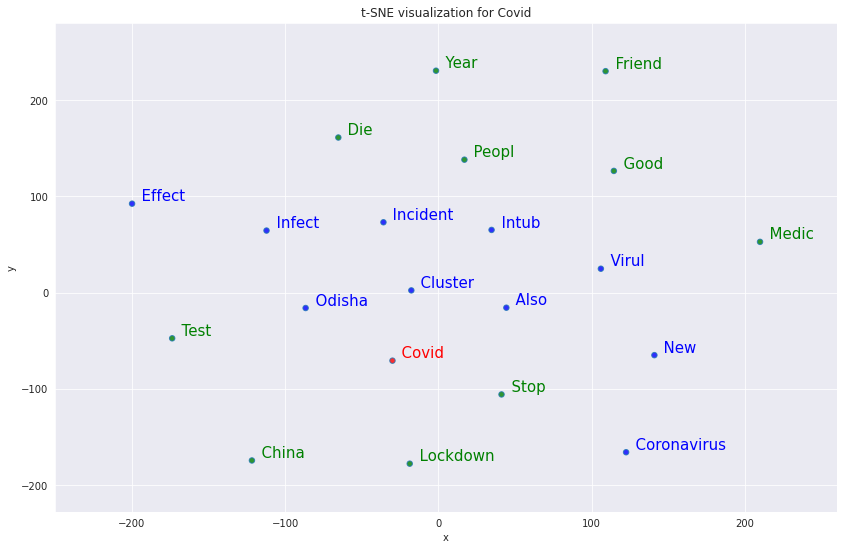

In [68]:
tsnescatterplot(w2v_model, 'covid', ['die', 'test', 'stop', 'china', 'good', 'year', 'medic', 'lockdown', 'friend', 'peopl'])

the 10 most similar words to Homer ends up around him

In [69]:
# tsnescatterplot(w2v_model, 'covid',list(w2v_model.wv.key_to_index.keys())[100:1000:12])

**10 Most similar words vs. 10 Most dissimilar**<br>
This time, let's compare where the vector representation of "*vaccine*" and her 10 most similar words from the model lies compare to the vector representation of the 10 most dissimilar words to "*vaccine*"

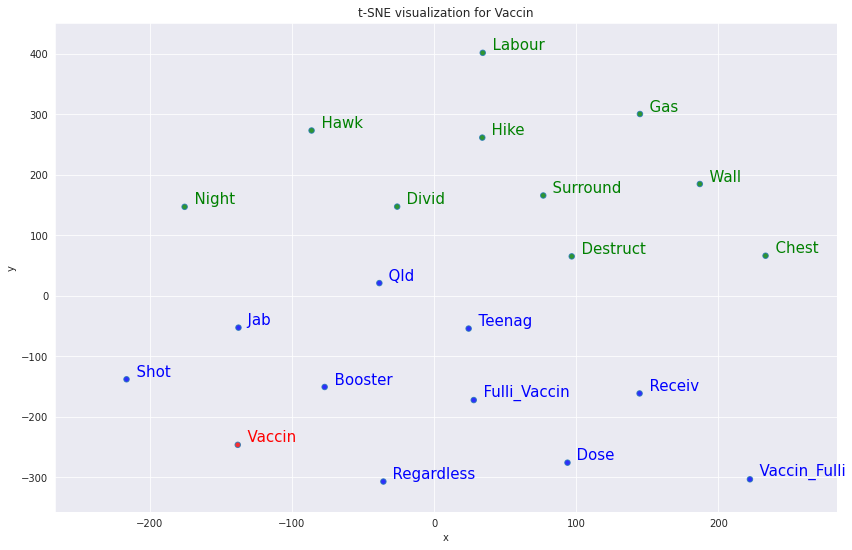

In [70]:
tsnescatterplot(w2v_model, 'vaccin', [i[0] for i in w2v_model.wv.most_similar(negative=["vaccin"])])

**Use Word2vec to train a machine learning classifier**
* 1. Naive Bayes
* 2. Decision Tree
* 3. Random Forest
* 4. Gradient Boosting
* 5. Logistic Regression
* 6. SVM


In [71]:
sentences_df = pd.DataFrame({"sentences":sentences,"sentiment":final_data.sentiment})

In [72]:
## splitting the dataset into 80:20.  have kept shuffle=True , so that the data is randomly sampled or simply said shuffled , and then split.
X_train, X_test, y_train, y_test = train_test_split(sentences_df.sentences, sentences_df.sentiment, test_size=0.2, shuffle=True)

In [73]:
w2v = dict(zip(w2v_model.wv.index_to_key, w2v_model.wv.vectors))

In [74]:
class Vectorizer(object):
    
    def __init__(self, vec):
        self.vec = vec
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.vec[w] for w in words if w in self.vec] or [np.zeros(self.dim)], axis=0) for words in X])


## for any Classifier , we need intialise the model with the parameters. 
## Further I am applying GridSearchCV for 5 runs (i.e 1/5th data used each time for testing) 
## So the model gets trained over 5 runs 
## as well we are predicting also over 5 runs
class Classifier(object):
    
    def __init__(self, model, param):
        self.model = model
        self.param = param
        self.gs = GridSearchCV(self.model, self.param, cv=5, error_score=0, refit=True)        

    def fit(self, X, y):   
        return self.gs.fit(X, y)

    def predict(self, X):
        return self.gs.predict(X)
    

## Preparing to make a pipeline 
## What to know about Pipelining : see this https://www.youtube.com/watch?v=Y4iJfKX_QeQ&t=52s
clf_models = {
    'SVM': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),  
    'logistic regression' : LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
#     'Gradient Boosting': GradientBoostingClassifier()
}

clf_params = {
    'SVM': { 'kernel': ['linear', 'rbf'] },
    'Random Forest Classifier': {'criterion': ['gini', 'entropy'] },
    'Naive Bayes': { }, 
    'logistic regression' : {'max_iter':[2000]},
    'Decision Tree': { 'min_samples_split': [2, 5] }, 
    'Gradient Boosting': { 'learning_rate': [0.05, 0.1]}
}

In [75]:
%%time
import warnings
warnings.filterwarnings("ignore")

print("==============Word2Vec==============\n")
## for loop traverses , each and every classifier and its corresponding parameters.
for key in clf_models.keys():
    
    clf = Pipeline([('Word2Vec vectorizer', Vectorizer(w2v)), ('Classifier', Classifier(clf_models[key], clf_params[key]))])
    
    clf.fit(X_train, y_train)  ## Note : we are calling user defined fit method. This fit method uses Cross Validation
    y_pred = clf.predict(X_test)  ## Note : we are calling user defined predict method. This predict method uses Cross Validation
    
    ## printing performance metrics for each classifier 
    print(key, ':')
    print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))

==============Word2Vec==============

SVM :
Accuracy: 0.691 	Precision: 0.729 	Recall: 0.636 		F1: 0.656

Random Forest Classifier :
Accuracy: 0.670 	Precision: 0.728 	Recall: 0.615 		F1: 0.638

Naive Bayes :
Accuracy: 0.502 	Precision: 0.515 	Recall: 0.524 		F1: 0.487

logistic regression :
Accuracy: 0.654 	Precision: 0.666 	Recall: 0.602 		F1: 0.617

Decision Tree :
Accuracy: 0.558 	Precision: 0.544 	Recall: 0.537 		F1: 0.540

CPU times: user 28min 43s, sys: 29.8 s, total: 29min 12s
Wall time: 27min 46s


# Gensim FastText Implementation
A word can be represented by its constituent character ngrams. Following a similar architecture to Word2vec, fastText learns embeddings for words and character n-grams together and views a word’s embedding vector as an aggregation of its constituent character n-grams. This makes it possible to generate embeddings even for words that are not present in the vocabulary. Say there’s a word, “gregarious,” that’s not found in the embedding’s word vocabulary. We break it into character n-grams—gre, reg, ega, ….ous—and combine these embeddings of the ngrams to arrive at the embedding of “gregarious.”

How FastText Works?

FastText is a modified version of word2vec (i.e.. Skip-Gram and CBOW). The only difference between fastText vs word2vec is its pooling strategies (what are the input, output, and dictionary of the model). In word2vec each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram.

In [76]:
fasttext_model = FastText(sentences=sentences,
                          window=2,
                          vector_size=300,
                          min_count=6,
                          sample=6e-5,
                          alpha=0.03, 
                          min_alpha=0.0007,
                          epochs=10
                         )

**Building the Vocabulary Table**

In [77]:
fasttext_model.build_vocab(sentences, progress_per=20000)

**Training of the model:**

In [78]:
fasttext_model.train(sentences, total_examples=fasttext_model.corpus_count, epochs=45, report_delay=1)

(5732622, 12850470)

**Exploring the model**

In [79]:
fasttext_model.wv.most_similar("corona")

[('coronavirus', 0.8070240616798401),
 ('sourc_coronatrackernep', 0.6854993104934692),
 ('sourc', 0.5694473385810852),
 ('total_activ', 0.5615239143371582),
 ('corp', 0.5595676898956299),
 ('cov', 0.5219590067863464),
 ('today_activ', 0.5066999197006226),
 ('corpor', 0.503876268863678),
 ('core', 0.49152323603630066),
 ('recov_activ', 0.49072813987731934)]

**t-SNE visualizations**

* 10 Most similar words vs. 10 Random words

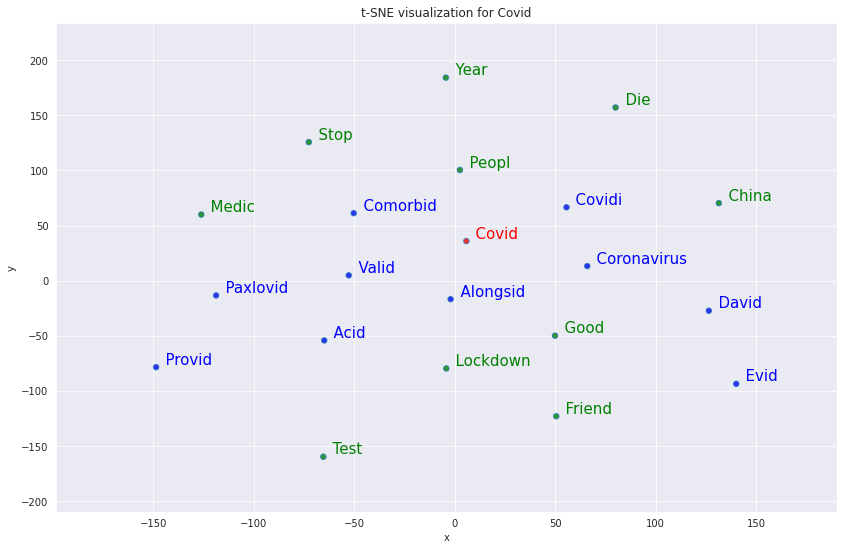

In [80]:
tsnescatterplot(fasttext_model, 'covid', ['die', 'test', 'stop', 'china', 'good', 'year', 'medic', 'lockdown', 'friend', 'peopl'])

**10 Most similar words vs. 10 Most dissimilar**

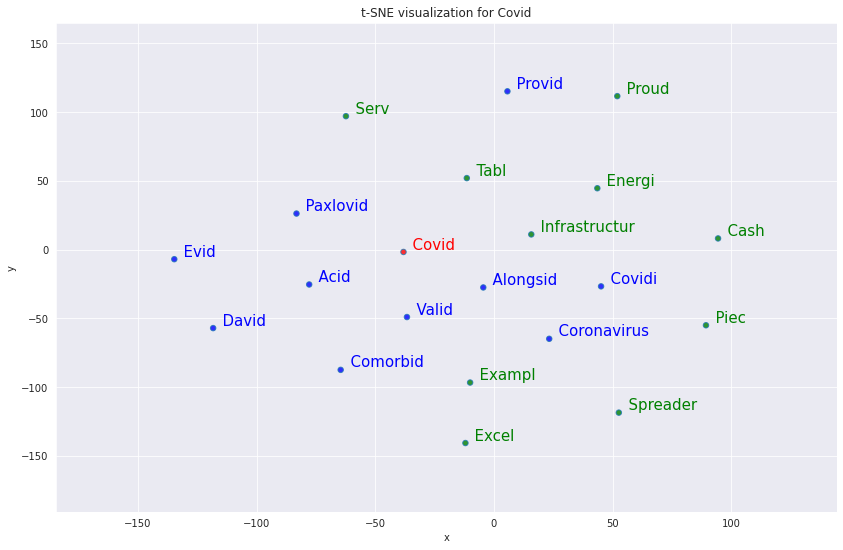

In [81]:
tsnescatterplot(fasttext_model, 'covid', [i[0] for i in w2v_model.wv.most_similar(negative=["covid"])])

**Ml Models**

In [82]:
## splitting the dataset into 80:20.  have kept shuffle=True , so that the data is randomly sampled or simply said shuffled , and then split.
X_train, X_test, y_train, y_test = train_test_split(sentences_df.sentences, sentences_df.sentiment, test_size=0.2, shuffle=True)

In [83]:
ftv = dict(zip(fasttext_model.wv.index_to_key, fasttext_model.wv.vectors))

In [84]:
%%time
import warnings
warnings.filterwarnings("ignore")

print("==============FastText==============\n")
## for loop traverses , each and every classifier and its corresponding parameters.
for key in clf_models.keys():
    
    clf = Pipeline([('FastText vectorizer', Vectorizer(ftv)), ('Classifier', Classifier(clf_models[key], clf_params[key]))])
    
    clf.fit(X_train, y_train)  ## Note : we are calling user defined fit method. This fit method uses Cross Validation
    y_pred = clf.predict(X_test)  ## Note : we are calling user defined predict method. This predict method uses Cross Validation
    
    ## printing performance metrics for each classifier 
    print(key, ':')
    print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))

==============FastText==============

SVM :
Accuracy: 0.675 	Precision: 0.710 	Recall: 0.619 		F1: 0.638

Random Forest Classifier :
Accuracy: 0.655 	Precision: 0.711 	Recall: 0.600 		F1: 0.623

Naive Bayes :
Accuracy: 0.485 	Precision: 0.493 	Recall: 0.500 		F1: 0.467

logistic regression :
Accuracy: 0.638 	Precision: 0.643 	Recall: 0.583 		F1: 0.596

Decision Tree :
Accuracy: 0.559 	Precision: 0.540 	Recall: 0.539 		F1: 0.539

CPU times: user 29min 4s, sys: 32.7 s, total: 29min 37s
Wall time: 28min 3s
